##getting the data

In [92]:
import pandas as pd
data = pd.read_csv("Rainfall.csv")
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [94]:
data.columns = data.columns.str.strip()

In [95]:
data.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [96]:
data.windspeed.fillna(data['windspeed'].mode()[0],inplace=True)
data['winddirection'].fillna(data['winddirection'].mode()[0], inplace=True)

/tmp/ipython-input-2409513861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.windspeed.fillna(data['windspeed'].mode()[0],inplace=True)
/tmp/ipython-input-2409513861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  366 non-null    float64
 11  windspeed      366 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [98]:
data.winddirection.unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
       160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [99]:
data['winddirection'] = data['winddirection'].astype(int)

In [100]:
data.rainfall.value_counts()

,count
rainfall,
yes,249
no,117


#YES --> 1</br>NO --> 0

In [101]:
data.rainfall = data.rainfall.map({'yes':1,'no':0})

In [102]:
data.rainfall.value_counts()

,count
rainfall,
1,249
0,117


In [103]:
data.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    int64  
 9   sunshine       366 non-null    float64
 10  winddirection  366 non-null    int64  
 11  windspeed      366 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 34.4 KB


In [105]:
data.shape

(366, 12)

In [106]:
rainfall = data.pop('rainfall')

In [107]:
data.shape

(366, 11)

In [108]:
data.insert(11,'rainfall',rainfall)
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80,26.3,1
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50,15.3,1
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40,14.2,1
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50,16.9,1
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40,13.7,1


##Data Visualization

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
sns.set_style('darkgrid')

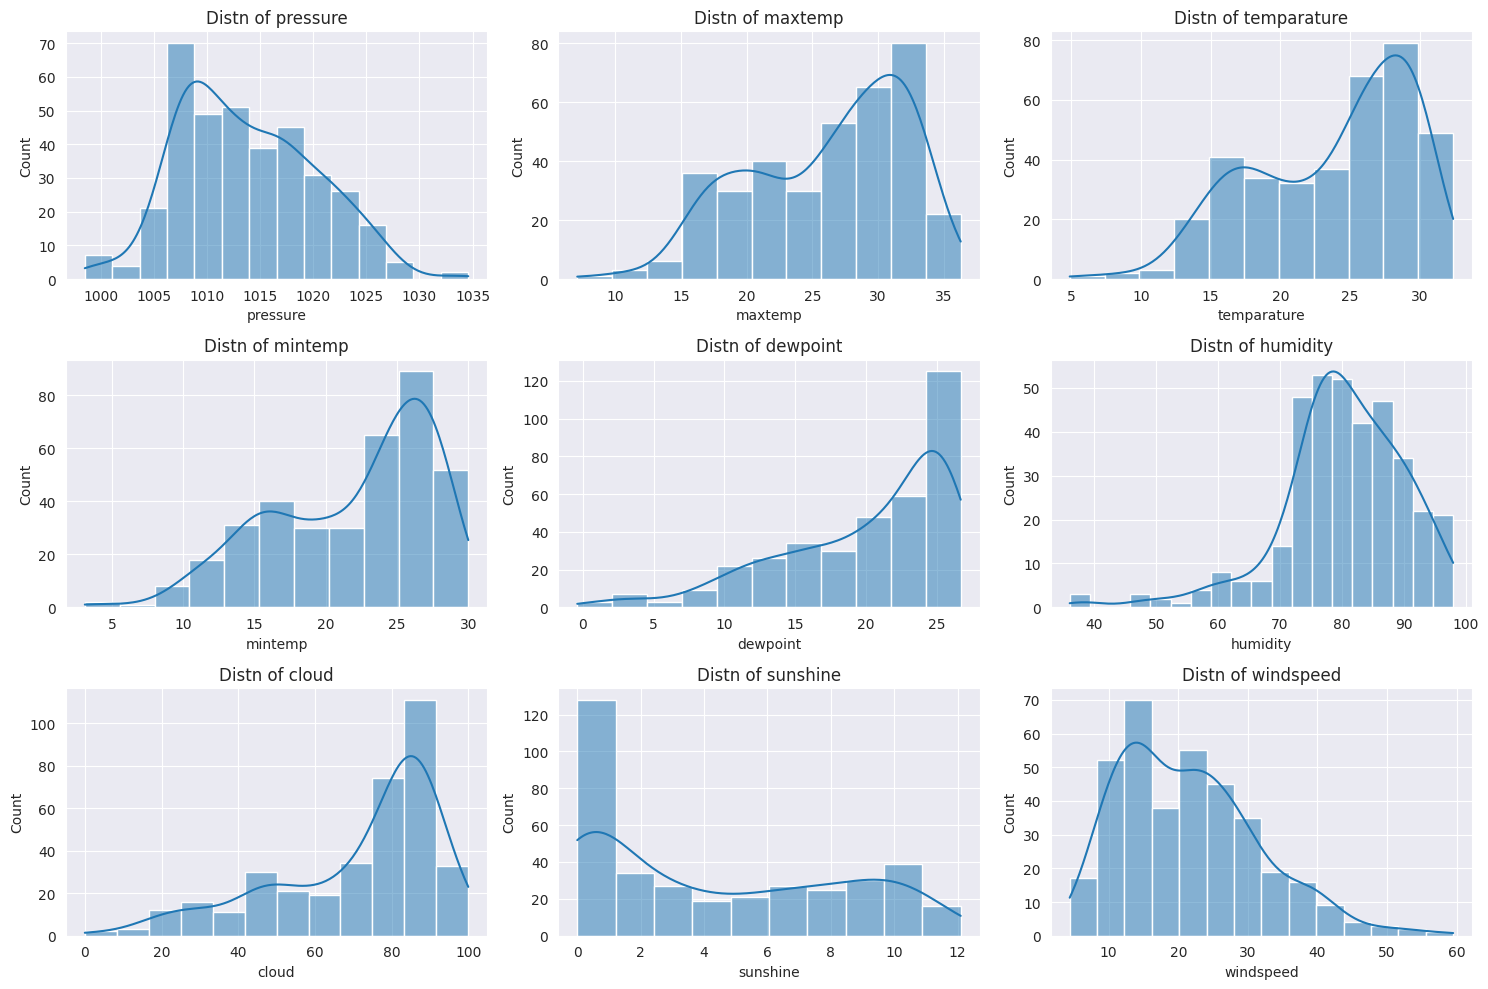

In [111]:
plot = plt.figure(figsize=(15,10))
for i, coloumn in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(data[coloumn], kde=True)
  plt.title(f"Distn of {coloumn}")
plt.tight_layout()
plt.show()

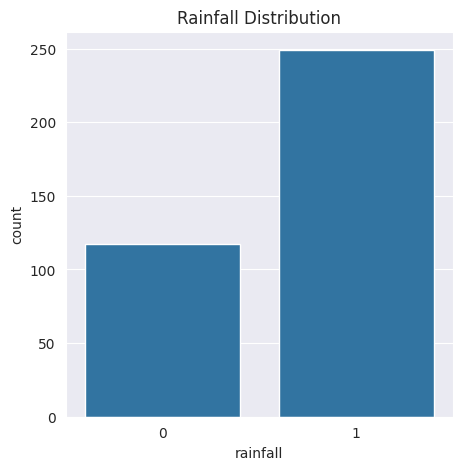

In [112]:
plot = plt.figure(figsize=(5,5))
sns.countplot(x = 'rainfall', data=data)
plt.title("Rainfall Distribution")
plt.show()

#Sampling the data

In [113]:
data['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [114]:
data_majority = data[data['rainfall']==0]
data_minority = data[data['rainfall']==1]
print(data_majority.shape, data_minority.shape)

(117, 12) (249, 12)


In [115]:
from sklearn.utils import resample

In [116]:
majority_data_sample = resample(data_majority, n_samples=len(data_minority), random_state=42)

In [117]:
resample_data = pd.concat([majority_data_sample, data_minority])

In [118]:
resample_data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
329,25,1017.7,25.3,22.6,18.2,16.8,70,44,6.9,20,28.6,0
189,8,1001.0,34.2,31.0,28.1,25.9,75,46,10.4,280,23.5,0
293,20,1008.3,29.1,26.2,23.8,17.3,58,78,7.5,10,17.2,0
39,9,1020.8,21.2,16.7,12.7,7.2,54,29,10.2,40,17.2,0
333,29,1021.2,24.1,22.1,20.3,17.4,75,40,8.8,60,16.0,0


In [119]:
data_shuffle = resample_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [120]:
data_shuffle.rainfall

,rainfall
0,1
1,0
2,0
3,0
4,0
...,...
493,0
494,1
495,1
496,1


In [121]:
data_shuffle.rainfall.value_counts()

,count
rainfall,
1,249
0,249


##Splitting the data

In [122]:
x = data_shuffle.drop(['rainfall', 'day'], axis=1)
y = data_shuffle['rainfall']

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x.shape, x_train.shape, x_test.shape)

(498, 10) (398, 10) (100, 10)


#Model: Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
model = RandomForestClassifier()
params = {
    'n_estimators':[50, 100, 200],
    'max_features':['sqrt', 'log2'],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

Hypertuning using GridSearchCV

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [128]:
best_model = grid_search.best_estimator_

In [132]:
print(f"The best parameters are {grid_search.best_params_}")

The best parameters are {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [134]:
from sklearn.model_selection import cross_val_score

In [139]:
cv_score = cross_val_score(best_model, x_train, y_train, cv=5)
print(f"The Cross-Validation Score:{cv_score}")
print(f"The Mean Cross-Validation Score:{cv_score.mean() :.2f}")

The Cross-Validation Score:[0.8625     0.8625     0.8875     0.83544304 0.82278481]
The Mean Cross-Validation Score:0.85


In [140]:
predict_y = best_model.predict(x_test)

##Checking Predictions


In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [142]:
print("Test set Accuracy:", accuracy_score(y_test, predict_y))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, predict_y))
print("Classification Report:\n", classification_report(y_test, predict_y))

Test set Accuracy: 0.92
Test set Confusion Matrix:
 [[55  2]
 [ 6 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        57
           1       0.95      0.86      0.90        43

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



#Real-Time Prediction

In [145]:
inp = [1015.9,21.3,20.7,20.2,19.9,95,81,0,40,13.7]

In [147]:
inp_df = pd.DataFrame([inp], columns=x.columns)
inp_df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,21.3,20.7,20.2,19.9,95,81,0,40,13.7


In [148]:
prediction = best_model.predict(inp_df)
print(prediction)
if prediction[0] == 1:
  print("There will be Rainfall")
else:
  print("There wont be Rainfall")

[1]
There will be Rainfall
